In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/content/upload.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1025 non-null   int64  
 1   age       1025 non-null   int64  
 2   sex       1025 non-null   int64  
 3   cp        1025 non-null   int64  
 4   trestbps  1025 non-null   int64  
 5   chol      1025 non-null   int64  
 6   fbs       1025 non-null   int64  
 7   restecg   1025 non-null   int64  
 8   thalach   1025 non-null   int64  
 9   exang     1025 non-null   int64  
 10  oldpeak   1025 non-null   float64
 11  slope     1025 non-null   int64  
 12  ca        1025 non-null   int64  
 13  thal      1025 non-null   int64  
 14  target    1025 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 120.2 KB


In [5]:
df.head()

,Id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.describe()

,Id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,513.000000,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,296.036315,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257.000000,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,513.000000,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,769.000000,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,1025.000000,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'Id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>],
       [<Axes: title={'center': 'trestbps'}>,
        <Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>],
       [<Axes: title={'center': 'thalach'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

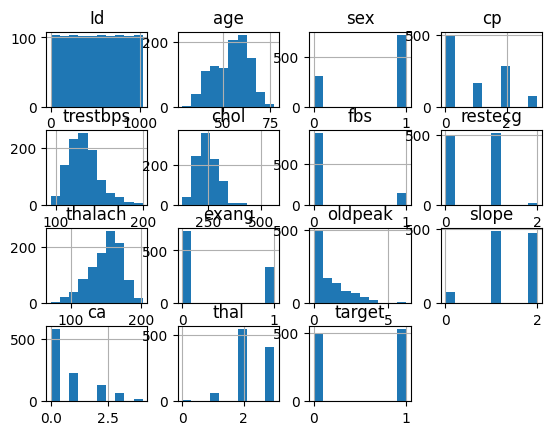

In [7]:
df.hist()

**Feature Selection**

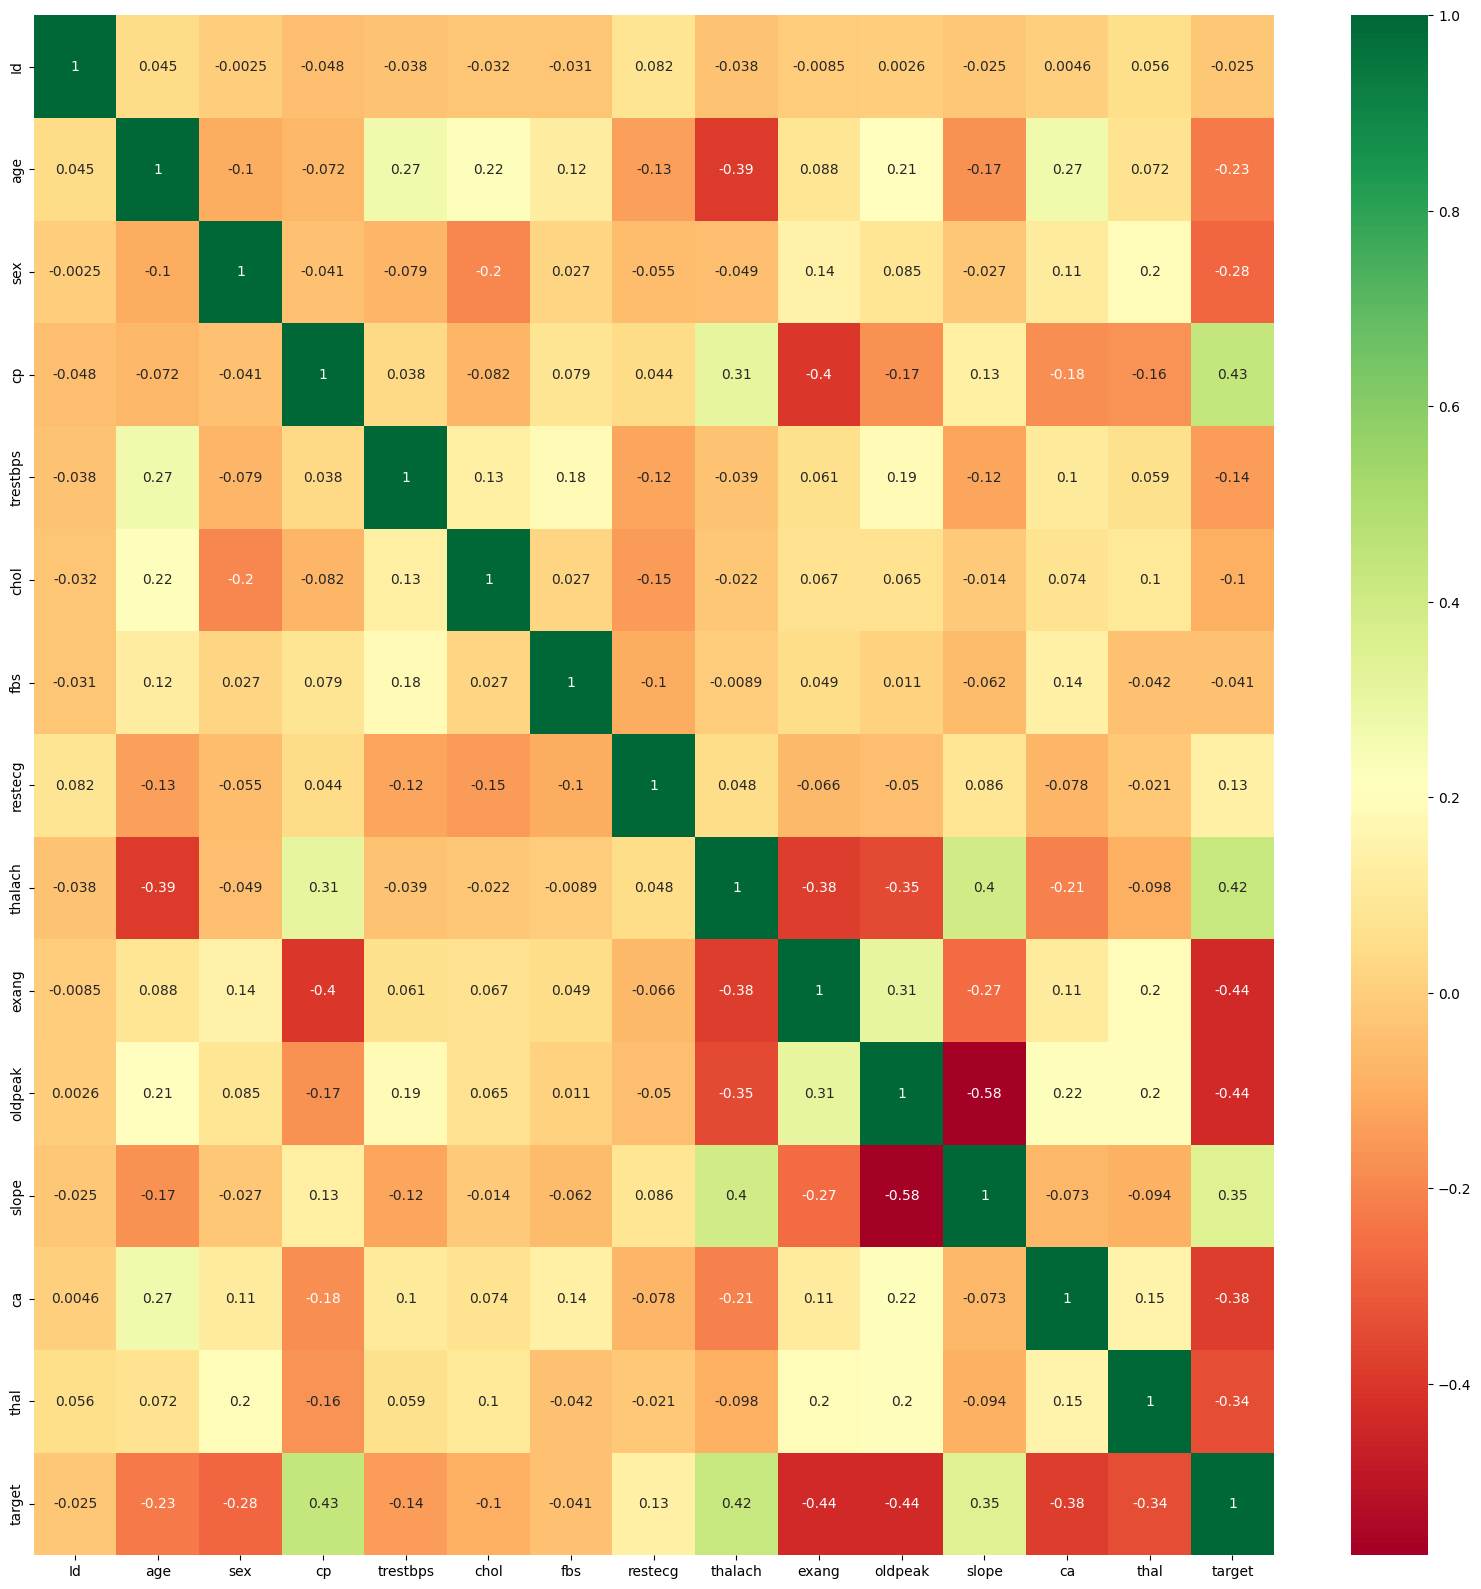

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: xlabel='target', ylabel='count'>

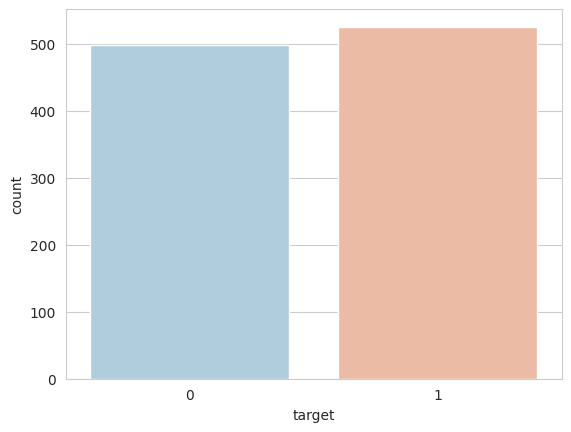

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

**Data Processing**

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [10]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [12]:
dataset.head()

,Id,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,...,True,False,False,True,False,False,False,False,False,True
1,2,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,...,False,True,False,False,False,False,False,False,False,True
2,3,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,...,False,True,False,False,False,False,False,False,False,True
3,4,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,...,True,False,True,False,False,False,False,False,False,True
4,5,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,...,False,False,False,False,True,False,False,False,True,False


In [13]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

**Kneighbors classifier**

In [14]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

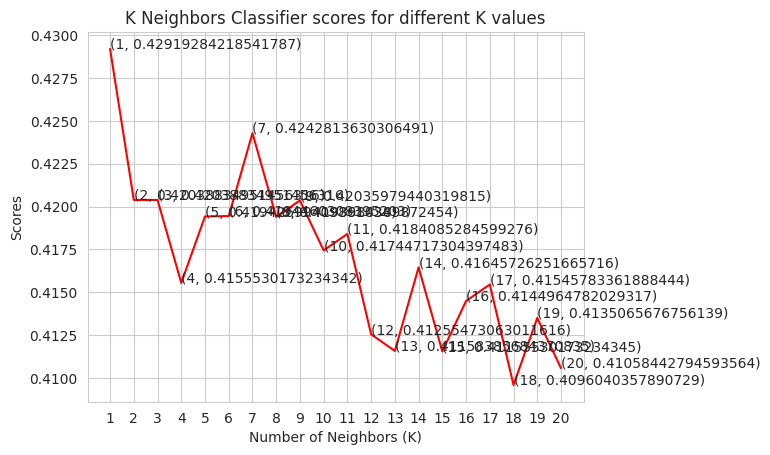

In [15]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [17]:
score.mean()

0.41255473063011616

**Decision Tree Classifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
decisiontree_classifier=DecisionTreeClassifier()

score=cross_val_score(decisiontree_classifier,X,y,cv=10)

In [20]:
score.mean()

0.984399390824291

**Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [23]:
score.mean()

0.9902531886541024